# 1-Import Data

In [1]:
# import numpy as np
# import pandas as pd
# from ipywidgets import GridBox, Layout

import fileselector as fs
from importlib import reload
reload(fs)
fs.load_dependencies()
# Usage
# Replace '/your/start/directory/' with your actual start directory
Path='/home/coder/project/doric_fiberphotometry/Data/CS'

file_selector = fs.FileSelector(Path)
# file_name = file_selector.get_selected_file()


Dropdown(description='Select File:', options=('Select a file', '258_NAc_CS_Feb13_0000_141926993_incomplete.dor…

Selected file: /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete.doric
loading dataset .....


GridBox(children=(Dropdown(description='Isos:', index=5, layout=Layout(height='100px', width='100%'), options=…

Button(description='Load Data', layout=Layout(display='none'), style=ButtonStyle())

Not all datasets were automatically selected, please review and select manually.
Datasets loaded.


ipympl is installed. You can proceed with %matplotlib ipympl.
Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//raw_data_seperated.png


/home/coder/project/doric_fiberphotometry/dataexplorer.py:390: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/coder/project/doric_fiberphotometry/dataexplorer.py:402: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(save_path_input.value, dpi=300, bbox_inches='tight')


Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//raw_data_merged.png


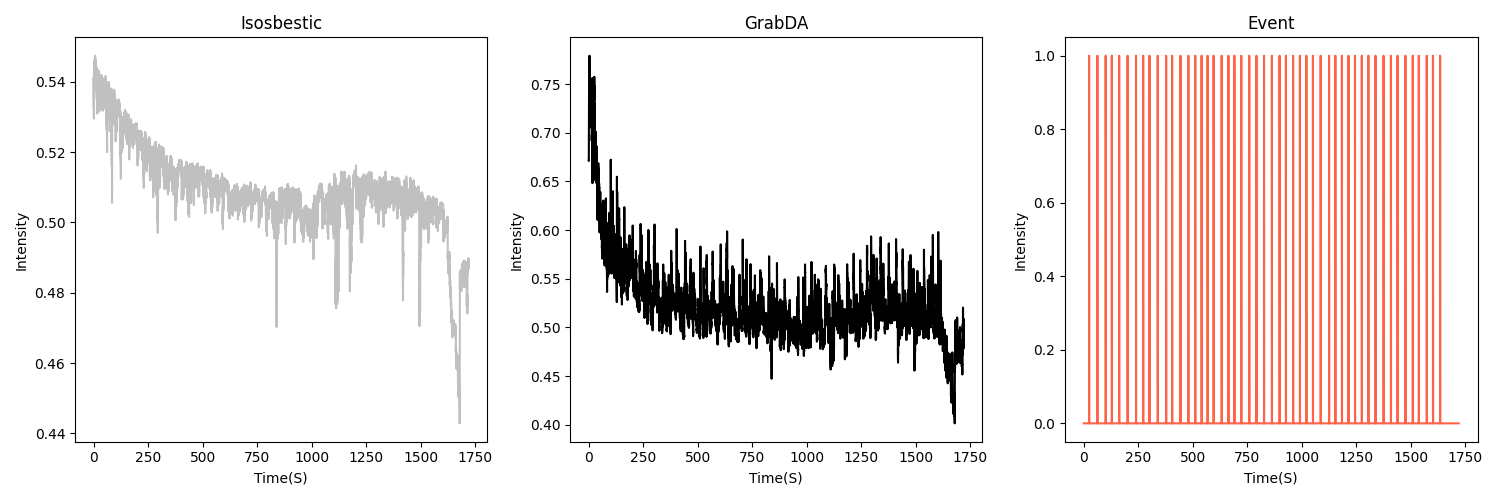

/usr/local/lib/python3.9/dist-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


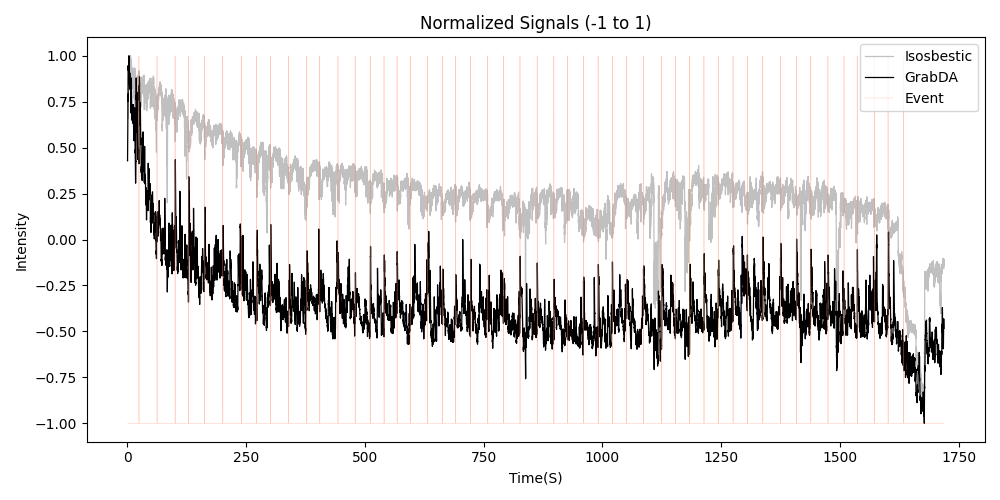

In [2]:
## After selecting datasets, the respective info will be displayed.
## Then, click "Load Data" button to load the datasets.
isos_df = file_selector.get_isos_df()
grabda_df = file_selector.get_grabda_df()
event_df = file_selector.get_event_df()

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import dataexplorer as de
from importlib import reload
try:
    import ipympl
    print("ipympl is installed. You can proceed with %matplotlib ipympl.")
    %matplotlib widget
except ImportError:
    print("ipympl is not installed. Please run !pip install ipympl.")
    !pip install ipympl
    %matplotlib widget


reload(de)

de.plot_and_save_seperated(isos_df, grabda_df, event_df,file_selector)

de.plot_and_save(isos_df,grabda_df,event_df,file_selector)



# CS Events


In [3]:
import dataexplorer as de
from importlib import reload

reload(de)

rising_edge_df = de.find_rising_edges(event_df)

classified_events_df = de.classify_events(rising_edge_df,Event_type='cs')
print(classified_events_df.head())
print("Event Number: ",len(classified_events_df))
    

       Time    Type  Sample_Number
0   24.1360  Reward       241360.0
1   62.1160    Omit       621160.0
2  100.1790  Reward      1001790.0
3  128.4297  Reward      1284297.0
4  162.0741  Reward      1620741.0
Event Number:  50


# Data Prepration


##  Use function get_zdFF to calculate z-dF/F

Download photometry_functions.py file from [here](https://github.com/katemartian/Photometry_data_processing "source").

please cite Jove paper:

__Martianova, E., Aronson, S., Proulx, C.D.__ [Multi-Fiber Photometry to Record Neural Activity in Freely Moving Animal.](https://www.jove.com/video/60278/multi-fiber-photometry-to-record-neural-activity-freely-moving). _J. Vis. Exp._ (152), e60278, doi:10.3791/60278 (2019).

[refrence](https://colab.research.google.com/github/katemartian/Photometry_data_processing/blob/master/Photometry_data_processing.ipynb#scrollTo=Lak9o-Hn3QQW)


In [4]:
from importlib import reload
import photometry_functions as pf
reload(pf)
# Usage
def save_signal(zdff):
    global signal_df 
    signal_df = zdff
    
    print(signal_df.head())
analysis = pf.PhotometryAnalysis(isos_df,grabda_df,save_signal)



IntText(value=10, description='Cutoff Freq:')

IntText(value=0, description='remove(ms):')

FloatLogSlider(value=500000000000.0, description='lambd:', max=16.0, min=5.0)

IntText(value=10, description='porder:')

IntText(value=50, description='itermax:')

Button(description='Run Function', style=ButtonStyle())

Output()

# PSTH Prepration

## Cut and Center the Data

In [6]:
import photometry_functions as pf
from importlib import reload

reload(pf)

# Example usage:
time_window = (-4, 10)  # For example, 2 seconds before and after the event
event_type = "Reward"  # Use "All" to process all events, or specify a particular type like 'Reward'
centralized_signals_df_Reward = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_Reward.head())

event_type = "Omit"  # Use "All" to process all events, or specify a particular type like 'Reward'
centralized_signals_df_Omit = pf.cut_and_center_signals_modified(signal_df, classified_events_df, time_window, event_type)
print(centralized_signals_df_Omit.head())





            Time      Data
Event Row                 
1     2004 -4.00  3.581235
      2005 -3.99  3.604390
      2006 -3.98  3.624739
      2007 -3.97  3.632799
      2008 -3.96  3.626265
            Time      Data
Event Row                 
1     5802 -4.00  0.251438
      5803 -3.99  0.253671
      5804 -3.98  0.264757
      5805 -3.97  0.278119
      5806 -3.96  0.285929


## Plot Dataset

### Plot all Signals 

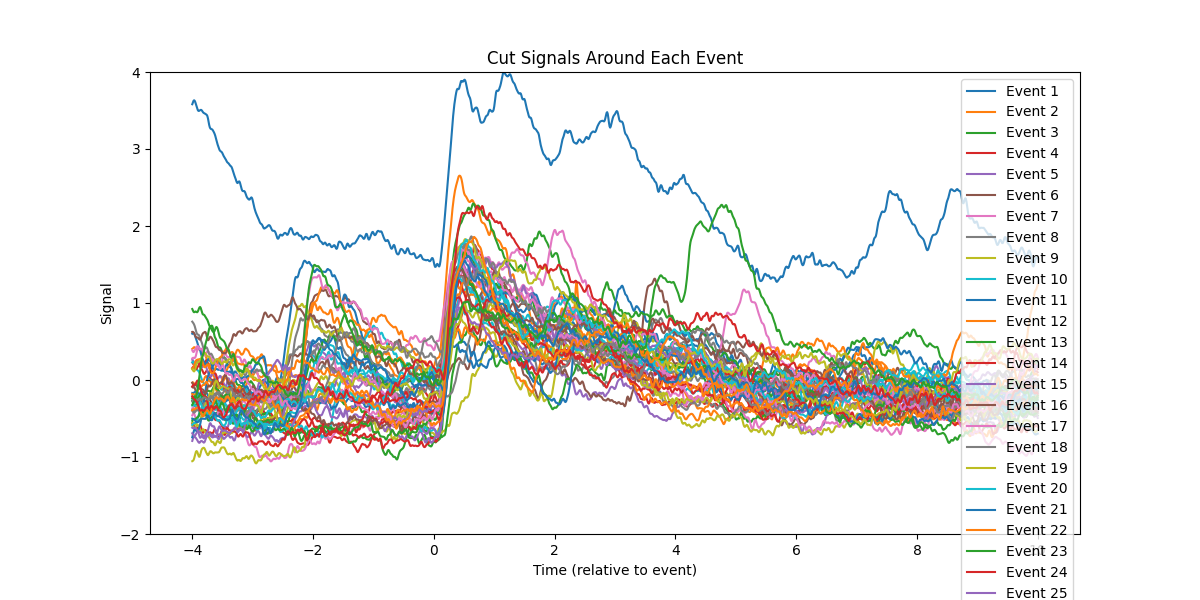

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//all_Rewards.png


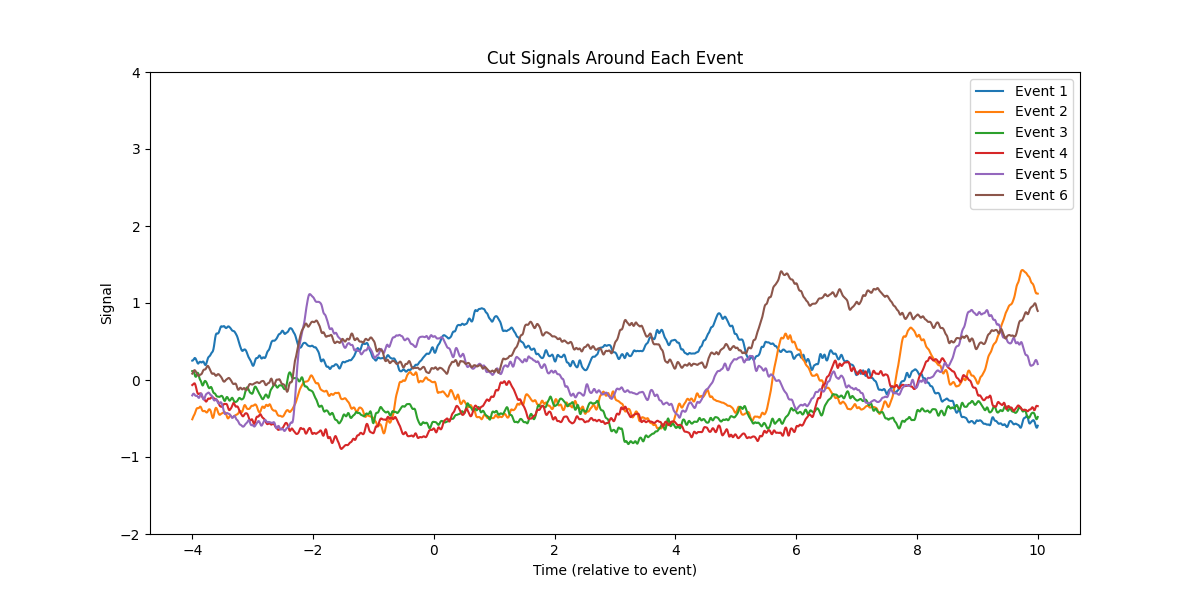

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//all_Omit.png


In [7]:
import os
# Plot All signals
y_min = -2
y_max = 4

import photometry_functions as pf
from importlib import reload
reload(pf)





# Reward:
fig = plt
pf.plot_cut_signals(centralized_signals_df_Reward,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_Rewards.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Omit:
fig = plt
pf.plot_cut_signals(centralized_signals_df_Omit,y_min,y_max)
# plot_cut_signals(filtered_signal_df)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/all_Omit.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")





### Plot Signals seperatly

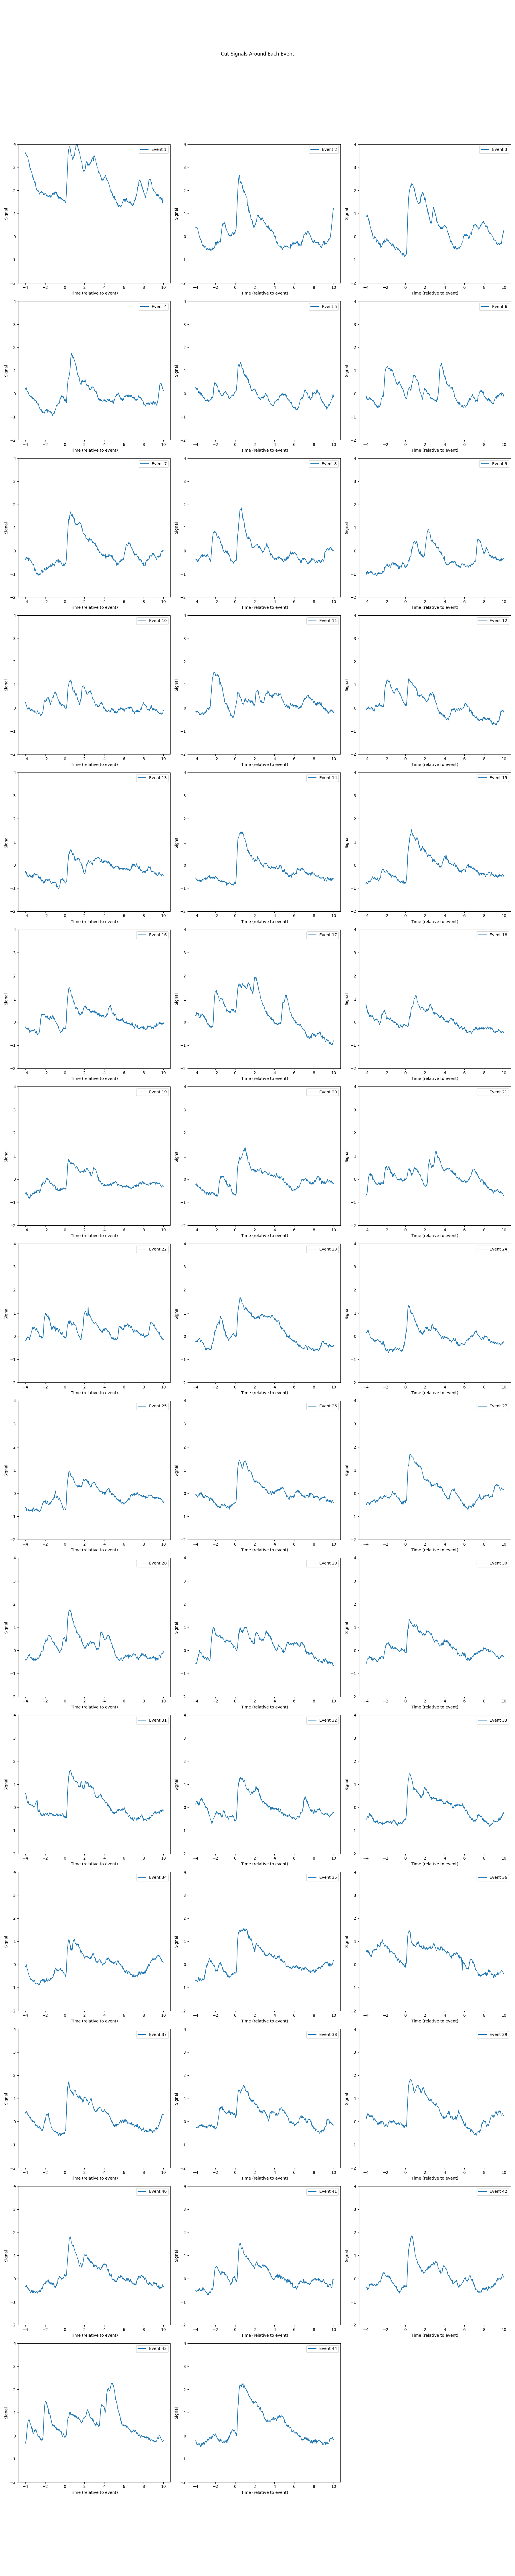

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//Separeted_Reward_Events.png


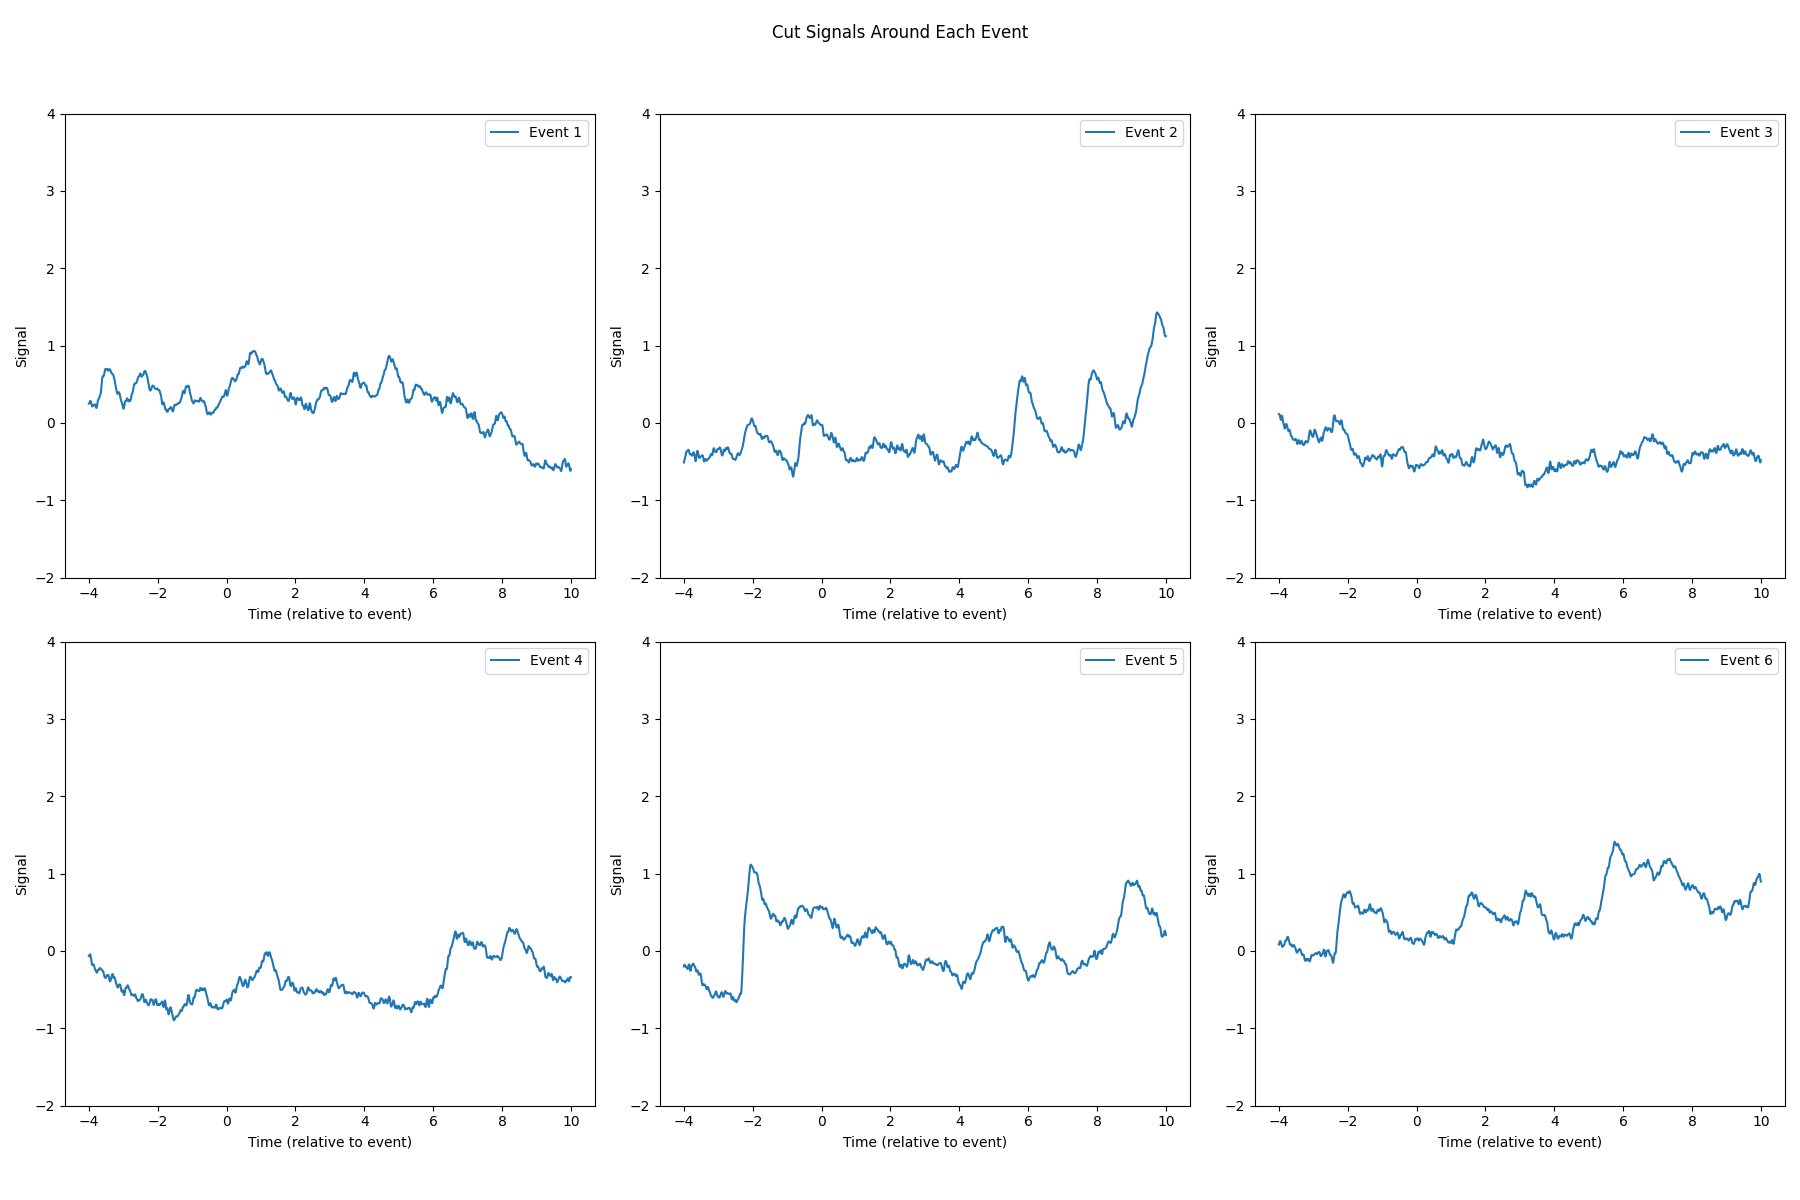

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//Separeted_Omit_Events.png


In [8]:


import photometry_functions as pf
from importlib import reload

reload(pf)

# Reward
pf.plot_cut_signals_seperated(centralized_signals_df_Reward,y_min,y_max)

fig = plt
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Separeted_Reward_Events.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Omit
pf.plot_cut_signals_seperated(centralized_signals_df_Omit,y_min,y_max)

fig = plt
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Separeted_Omit_Events.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")



### Plot and Select Signals for PSTH

In [9]:

import photometry_functions as pf
from importlib import reload

reload(pf)

# Example usage:

def handle_filtered_data(df,event_type):
    # Handle the filtered DataFrame here, e.g., save it to a global variable or process it further
    if event_type == 'Reward':    
        global filtered_signal_df_Reward
        filtered_signal_df_Reward = df
        print(filtered_signal_df_Reward.head())
        
    if event_type == 'Omit':    
        global filtered_signal_df_Omit
        filtered_signal_df_Omit = df
        print(filtered_signal_df_Omit.head())
    
    
    fig = plt
    filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Selected_Stim_Events_'+event_type+'.png'

    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)

    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Figure saved as {filename}")



# Reward:
explorer = pf.SignalExplorer(centralized_signals_df_Reward,'Reward', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction

# Omit:
explorer = pf.SignalExplorer(centralized_signals_df_Omit,'Omit', save_callback=handle_filtered_data)
# This will display the widgets and allow interaction


GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

GridspecLayout(children=(Checkbox(value=False, description='Select All', layout=Layout(grid_area='widget001'))…

Button(description='Apply Selection', style=ButtonStyle())

Output()

Filtered data is ready.
            Time      Data
Event Row                 
1     2004 -4.00  3.581235
      2005 -3.99  3.604390
      2006 -3.98  3.624739
      2007 -3.97  3.632799
      2008 -3.96  3.626265
Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//Selected_Stim_Events_Reward.png


Filtered data is ready.
            Time      Data
Event Row                 
1     5802 -4.00  0.251438
      5803 -3.99  0.253671
      5804 -3.98  0.264757
      5805 -3.97  0.278119
      5806 -3.96  0.285929
Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//Selected_Stim_Events_Omit.png


Filtered data is ready.
            Time      Data
Event Row                 
2     9608 -4.00  0.403949
      9609 -3.99  0.410157
      9610 -3.98  0.419350
      9611 -3.97  0.426000
      9612 -3.96  0.425353
Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//Selected_Stim_Events_Reward.png


## Normalization

In [10]:
import photometry_functions as pf
from importlib import reload

reload(pf)


# Reward:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
normalized_signal_df_Reward = pf.normalize_signal(filtered_signal_df_Reward, column='Data')

# Omit:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
normalized_signal_df_Omit = pf.normalize_signal(filtered_signal_df_Omit, column='Data')


# This will normalize between -1 and 1 (not recomended to run it will incrupt the AUC)

In [ ]:
import photometry_functions as pf
from importlib import reload

reload(pf)

# Reward:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
normalized_signal_df_Reward2 = pf.normalize_signal2(normalized_signal_df_Reward, column='Data')

# Omit:
# Assuming 'Data' is the column in filtered_signal_df that you want to normalize
normalized_signal_df_Omit2 = pf.normalize_signal2(normalized_signal_df_Omit, column='Data')


# Analyze Resaults

## PSTH 

[-6. -4. -2.  0.  2.  4.  6.  8. 10. 12.]
[-6.   -4.   -2.    0.    0.51  2.    4.    6.    8.   10.   12.  ]
[-6.   -4.   -2.    0.    0.38  0.51  2.    4.    6.    8.   10.   12.  ]
[-6.   -4.   -2.    0.    0.38  0.51  2.    4.    6.    8.   10.   12.  ]
[-6.   -4.   -2.    0.    0.38  0.51  2.    4.    6.    8.   10.   12.  ]
[-6.   -4.   -2.    0.    0.38  0.51  2.    4.    6.    8.   10.   12.  ]


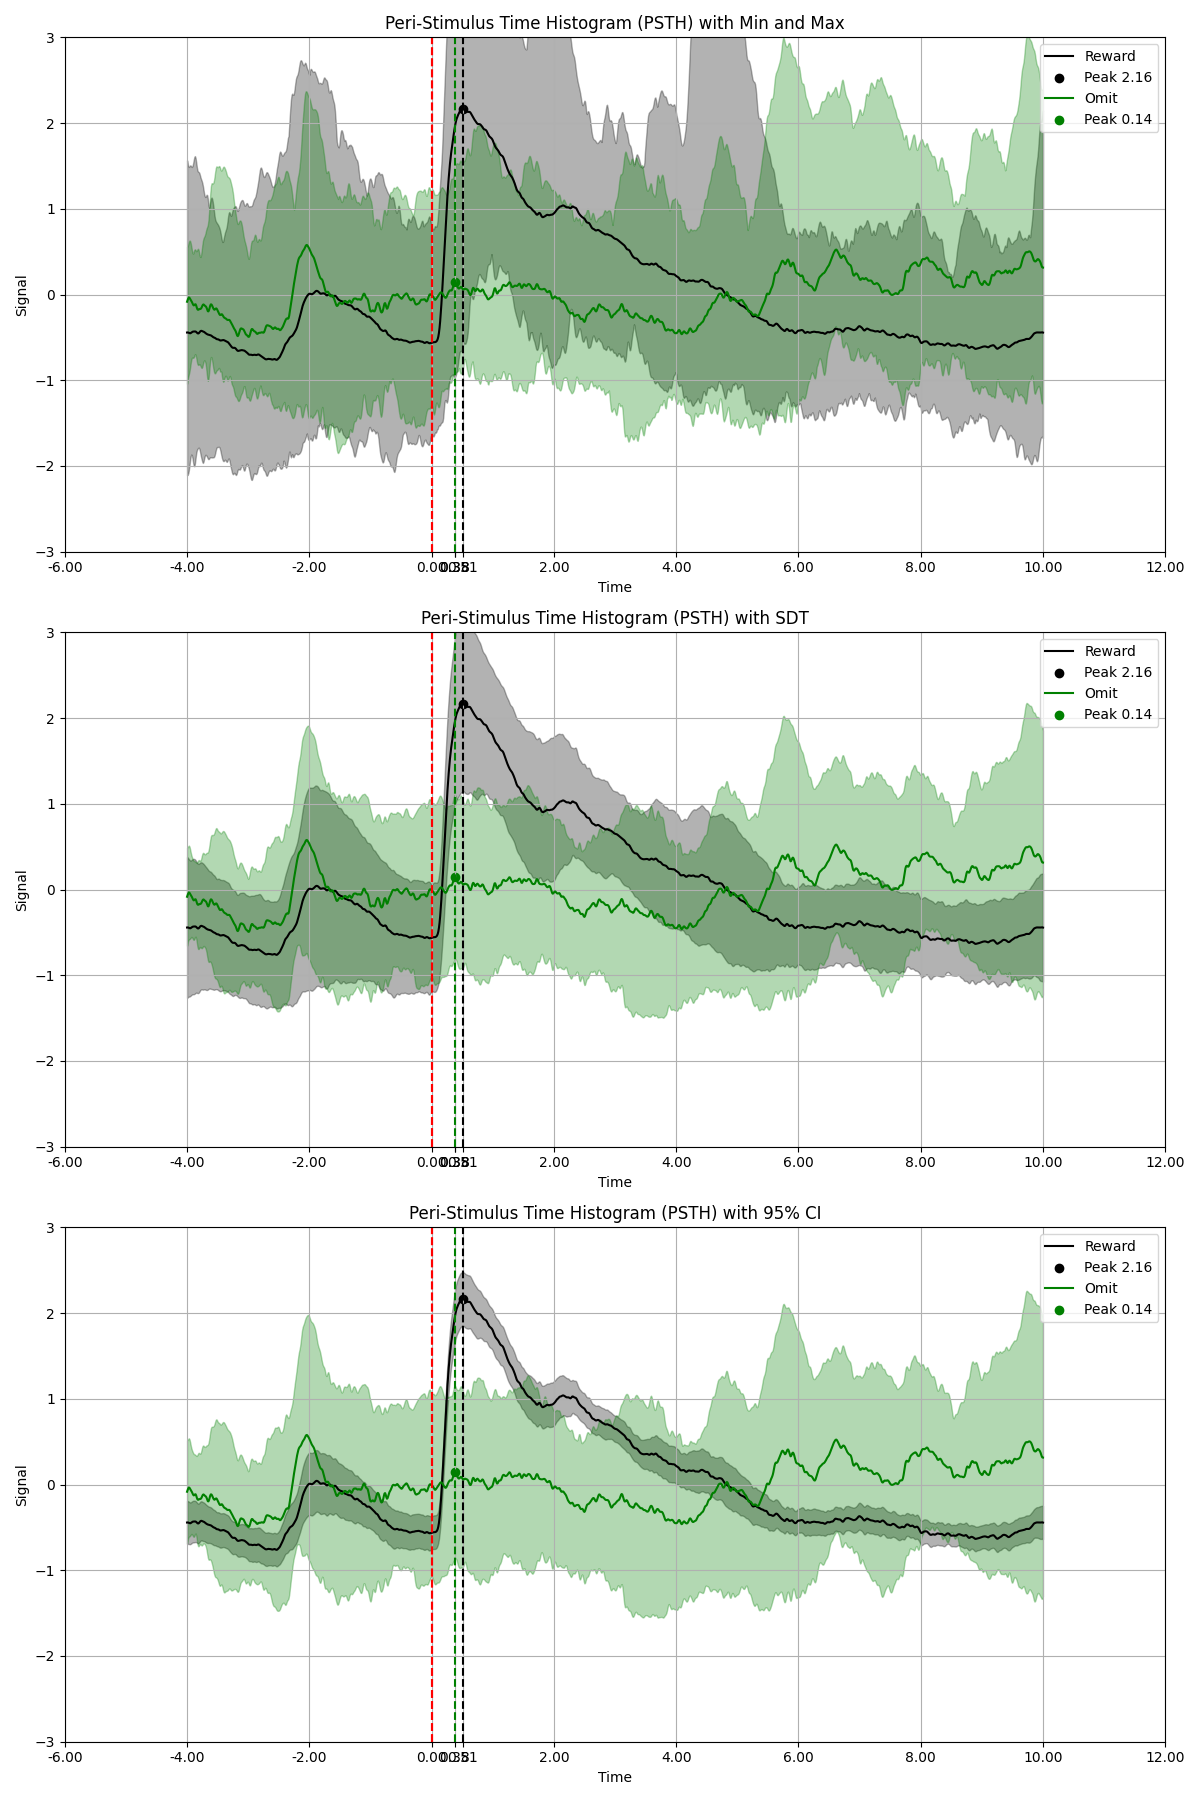

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs/PSTH.png


In [11]:
import photometry_functions as pf
import os
from importlib import reload

reload(pf)


PSTH_df_Reward=pf.create_psth_with_min_max(normalized_signal_df_Reward)
PSTH_df_Omit=pf.create_psth_with_min_max(normalized_signal_df_Omit)

PSTH_df_std_Reward = pf.create_psth_with_std(normalized_signal_df_Reward)
PSTH_df_std_Omit = pf.create_psth_with_std(normalized_signal_df_Omit)

PSTH_df_ci_Reward = pf.create_psth_with_ci(normalized_signal_df_Reward)
PSTH_df_ci_Omit = pf.create_psth_with_ci(normalized_signal_df_Omit)

# Create a figure and a 3x1 grid of subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))


# PSTH_df_Reward=pf.create_psth_with_min_max(normalized_signal_df_Reward)
# pf.plot_psth(PSTH_df_Reward, -3, 3,'black','Reward')
pf.plot_psth(PSTH_df_ci_Reward, -3, 3,'black','Reward',pos=axs[2])
pf.plot_psth(PSTH_df_ci_Omit, -3, 3,'green','Omit',pos=axs[2])


pf.plot_psth(PSTH_df_std_Reward, -3, 3,'black','Reward',pos=axs[1])
pf.plot_psth(PSTH_df_std_Omit, -3, 3,'green','Omit',pos=axs[1])
# plt.subplots(2,2,2)

pf.plot_psth(PSTH_df_Reward, -3, 3,'black','Reward',pos=axs[0])
pf.plot_psth(PSTH_df_Omit, -3, 3,'green','Omit',pos=axs[0])

plt.tight_layout()

plt.show()

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'PSTH.png'


directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")


## HeatMap

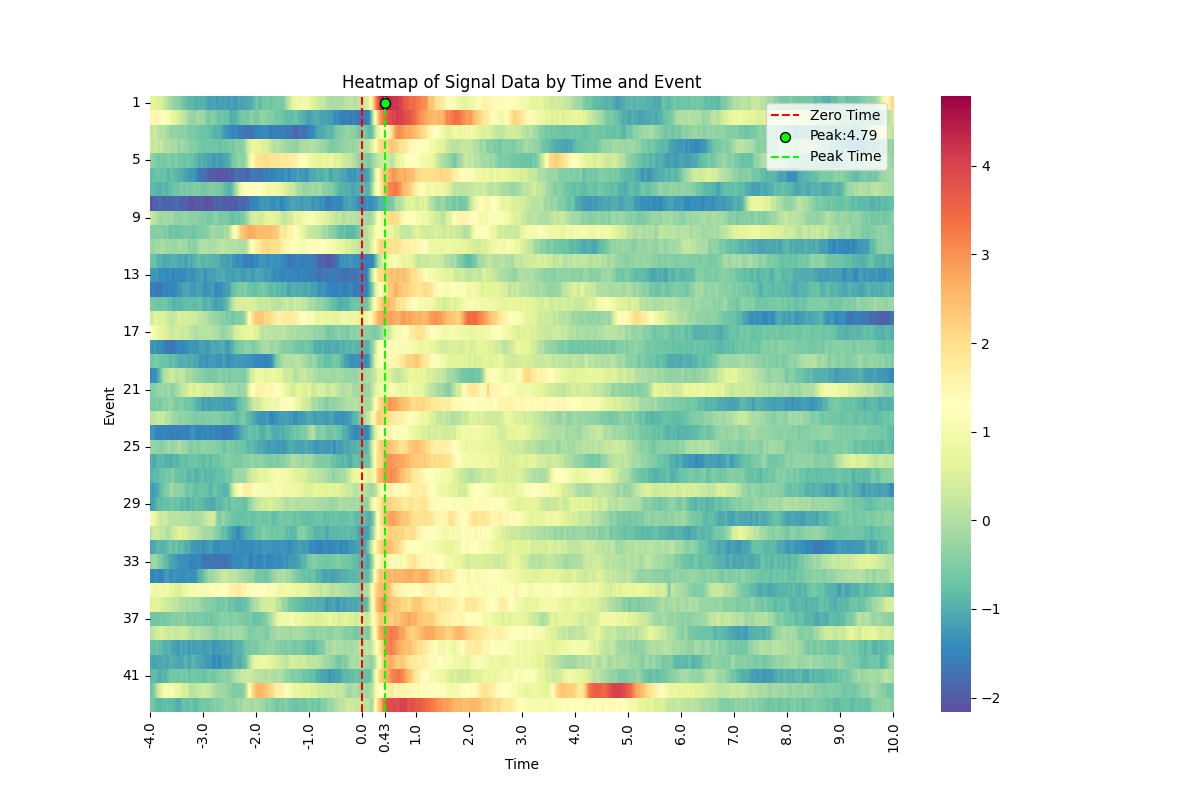

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//Heatmap_Reward.png


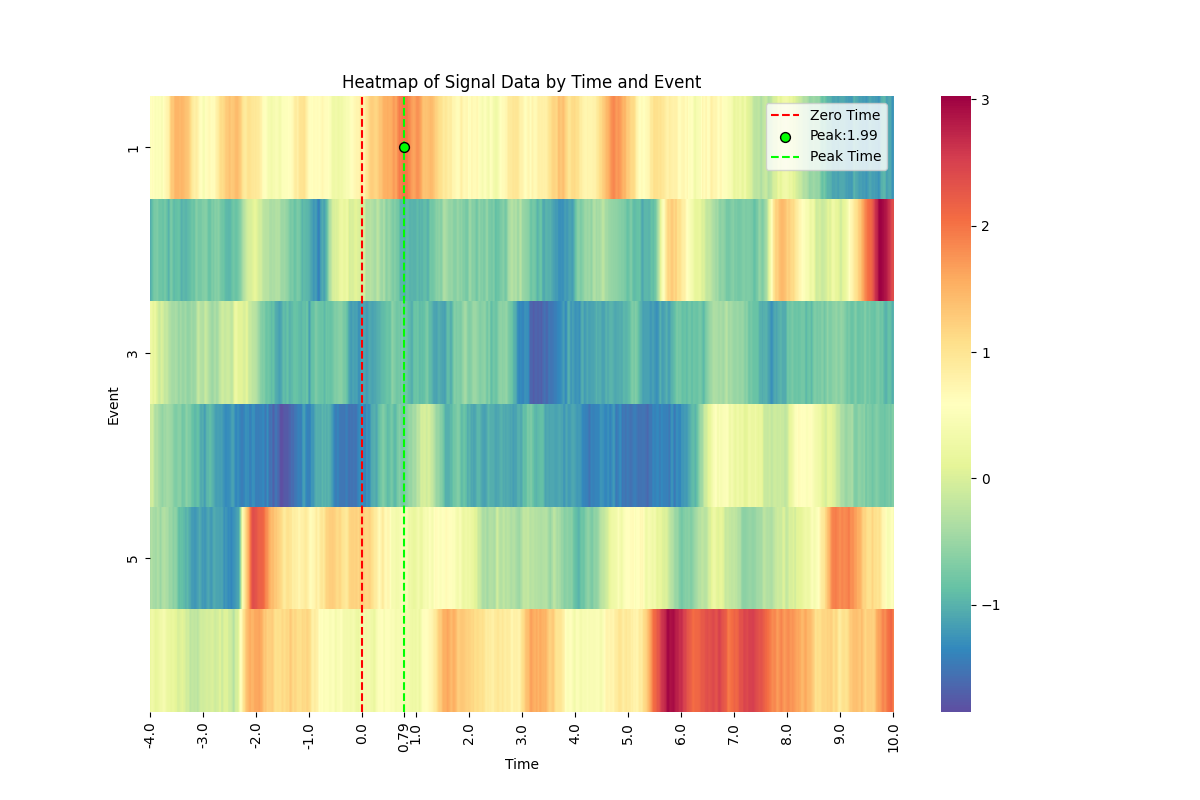

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs//Heatmap_Omit.png


In [12]:
import photometry_functions as pf
import os
from importlib import reload

reload(pf)

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Heatmap_Reward.png'
directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
pf.heatmap_plot(normalized_signal_df_Reward)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

filename = file_selector.file_path.split('.')[0]+'/Figs/'+'/Heatmap_Omit.png'
pf.heatmap_plot(normalized_signal_df_Omit)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")


### Area Under Curves 

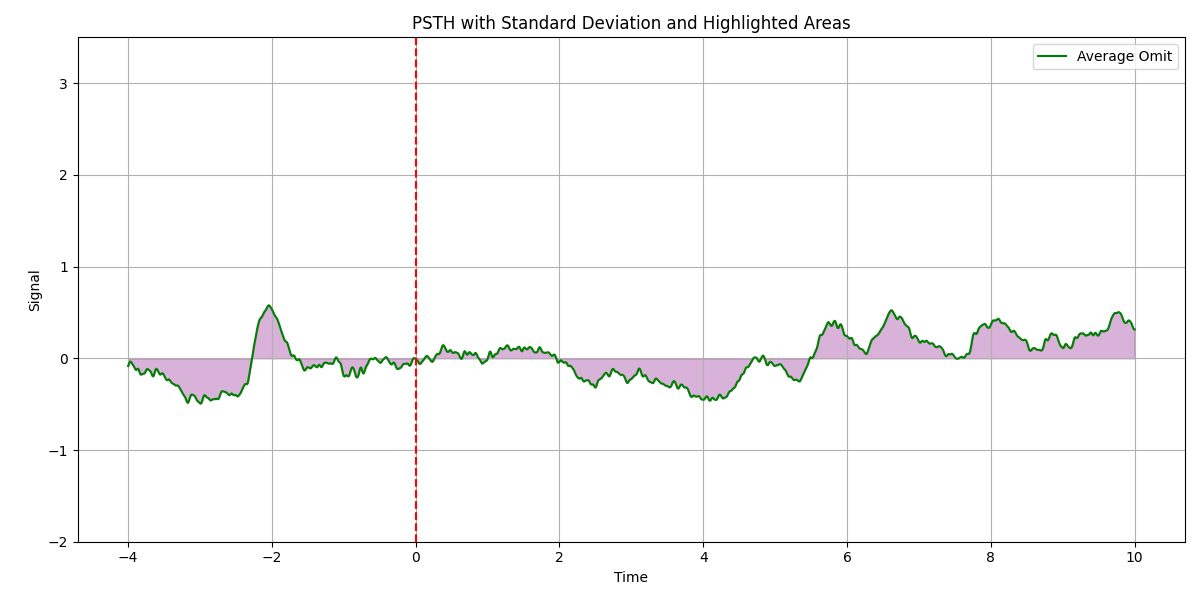

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs/AUC_Omit.png


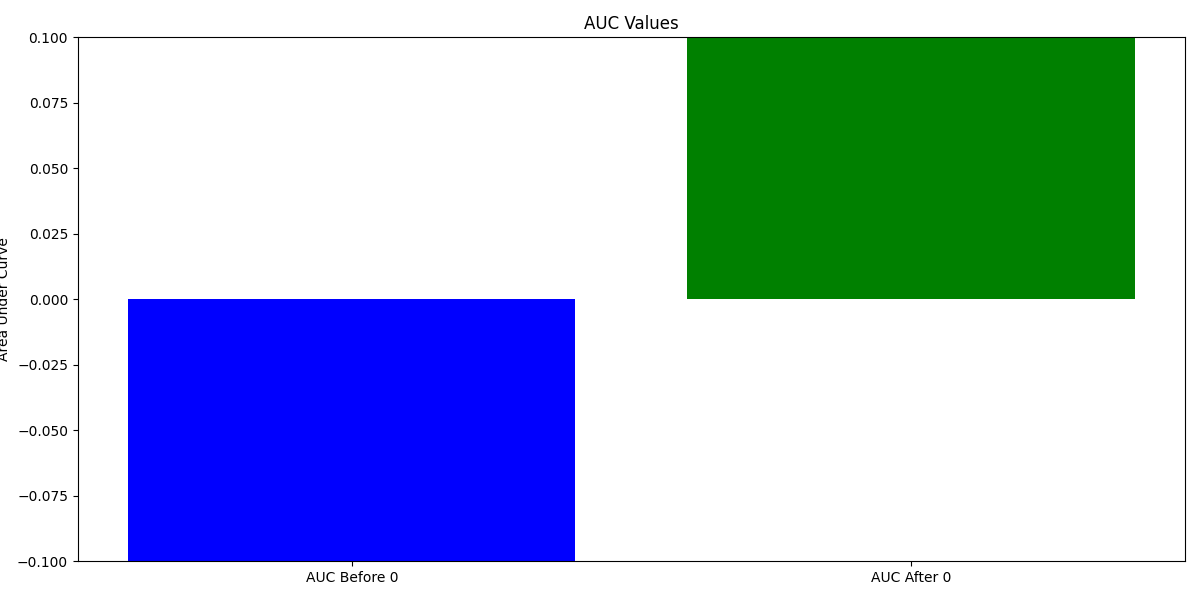

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs/AUC_Bars_Omit.png


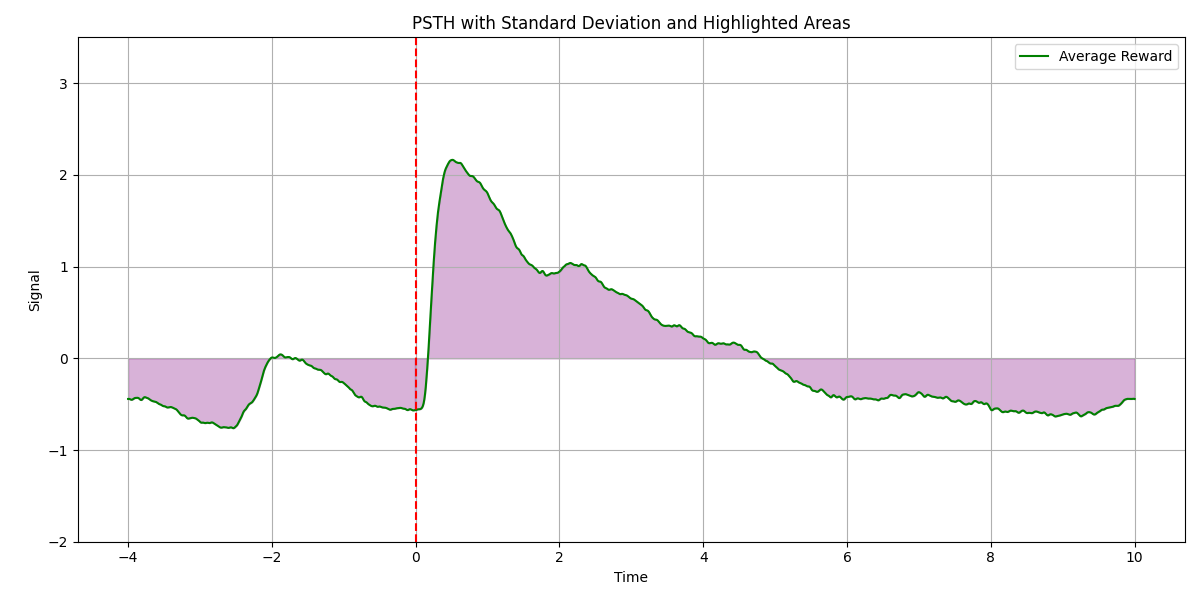

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs/AUC_Reward.png


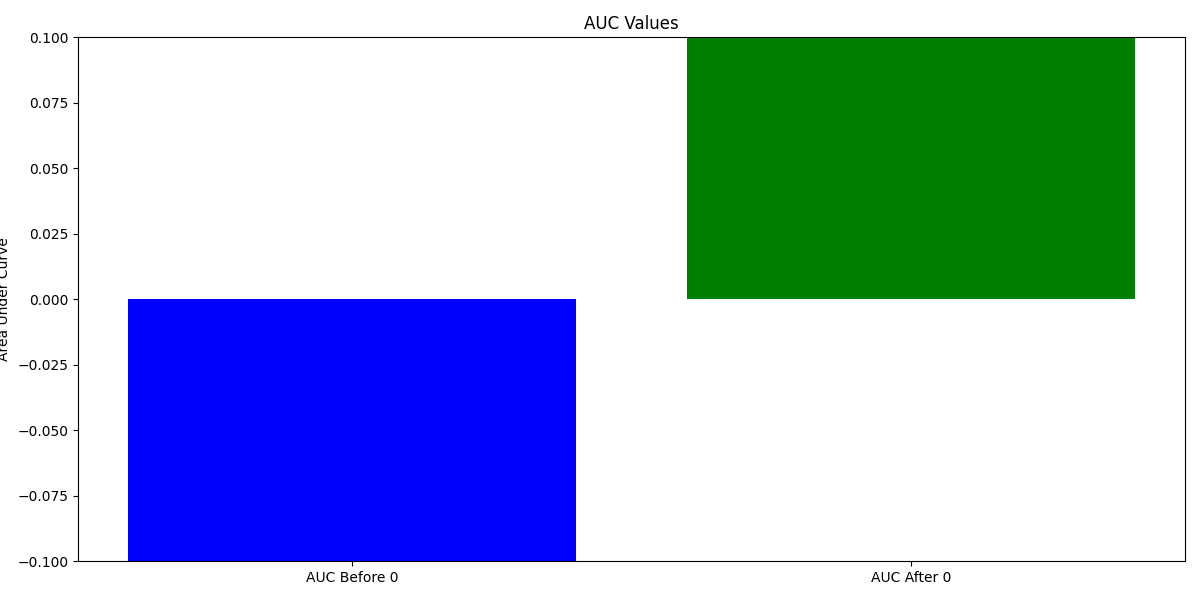

Figure saved as /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Figs/AUC_Bars_Reward.png


In [13]:
import photometry_functions as pf
from importlib import reload

reload(pf)

# Omit
plt.figure(figsize=(12, 6))

pf.plot_psth_auc(PSTH_df_std_Omit,-2, 3.5,'green','Omit')
plt.show()
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Omit.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

pf.plot_auc_bars(PSTH_df_std_Omit,-0.1, 0.1)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Bars_Omit.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

# Fail
plt.figure(figsize=(12, 6))

pf.plot_psth_auc(PSTH_df_std_Reward,-2, 3.5,'green','Reward')
plt.show()
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Reward.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")

pf.plot_auc_bars(PSTH_df_std_Reward,-0.1, 0.1)
filename = file_selector.file_path.split('.')[0]+'/Figs/'+'AUC_Bars_Reward.png'

directory = os.path.dirname(filename)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Figure saved as {filename}")



In [14]:
import pandas as pd
import datetime

def save_dataframes_to_csv():
    # Fetch the current datetime to append to file names to avoid overwriting
    now = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = file_selector.file_path.split('.')[0]+'/Data/'+'test.csv"'
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)
    # Loop through all global variables
    for var_name, value in list(globals().items()):
        # Check if the value is an instance of pd.DataFrame
        if isinstance(value, pd.DataFrame):
            # Construct filename with a timestamp to prevent overwriting
            file = f"{var_name}_{now}.csv"
            filename = file_selector.file_path.split('.')[0]+'/Data/'+file

            # Save the DataFrame to a CSV file
            value.to_csv(filename, index=False)
            print(f"Saved {filename}")


# Call the function to save all DataFrames
save_dataframes_to_csv()


Saved /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Data/isos_df_20240429_194308.csv
Saved /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Data/grabda_df_20240429_194308.csv
Saved /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Data/event_df_20240429_194308.csv
Saved /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Data/rising_edge_df_20240429_194308.csv
Saved /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Data/classified_events_df_20240429_194308.csv
Saved /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Data/signal_df_20240429_194308.csv
Saved /home/coder/project/doric_fiberphotometry/Data/CS/258_NAC_CS_Feb29_0000_113913473_incomplete/Data/centralized_signals_df_Reward_20240429_194308.csv
Saved /home/coder/project/dor